In [2145]:
from erpe.analysis import *
from erpe.models import *
from erpe.experiment_design import *

# autorload 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Create an RPE experiment design

In [2146]:
depths = [2**i for i in range(10)]
edesign_XI = EDesign_1QXI(depths, ['Q0'])
edesign_CZ = EDesign_CZ(depths, ['Q0', 'Q1'])

In [2147]:
print(len(edesign_XI.circuit_list), len(edesign_CZ.circuit_list))

59 60


In [2148]:
edesign_XI.germs

[Circuit(Gxpi2:Q0@(Q0)),
 Circuit(Gzpi2:Q0Gxpi2:Q0Gxpi2:Q0Gzpi2:Q0Gzpi2:Q0Gxpi2:Q0Gxpi2:Q0Gzpi2:Q0@(Q0)),
 Circuit(Gi:Q0@(Q0))]

In [2149]:
edesign_CZ.germs

[Circuit(Gcz:Q0:Q1@(Q0,Q1))]

# Create a model and simulate data

In [2150]:
xvec = np.array([0.1, 0.2, 0.3])
model_1Q = create_XI_model_1q(xvec, qid='Q0')
model_2Q = create_CZ_model(xvec)
model_1Q_target = create_XI_model_1q(np.zeros(3), qid='Q0')
model_2Q_target = create_CZ_model(np.zeros(3))


In [2151]:
num_shots = 1000
ds_XI = edesign_XI.make_dataset(model_1Q, num_shots)
ds_CZ = edesign_CZ.make_dataset(model_2Q, num_shots)

# Analyze data

In [2152]:
analysis_cz = Analysis_CZ(ds_CZ, edesign_CZ)
analysis_xi = Analysis_XI(ds_XI, edesign_XI)

In [2159]:
analysis_xi.rpe_outcome_dict

{Circuit(Gxpi2:Q0@(Q0)): {'0': {'I': {'+': [446.0,
     66.0,
     915.0,
     684.0,
     109.0,
     664.0,
     164.0,
     692.0,
     108.0,
     664.0],
    '-': [554.0,
     934.0,
     85.0,
     316.0,
     891.0,
     336.0,
     836.0,
     308.0,
     892.0,
     336.0]},
   'Q': {'+': [66.0,
     704.0,
     169.0,
     44.0,
     341.0,
     952.0,
     867.0,
     44.0,
     303.0,
     932.0],
    '-': [934.0,
     296.0,
     831.0,
     956.0,
     659.0,
     48.0,
     133.0,
     956.0,
     697.0,
     68.0]}}},
 Circuit(Gzpi2:Q0Gxpi2:Q0Gxpi2:Q0Gzpi2:Q0Gzpi2:Q0Gxpi2:Q0Gxpi2:Q0Gzpi2:Q0@(Q0)): {'0': {'I': {'+': [834.0,
     517.0,
     26.0,
     1000.0,
     997.0,
     996.0,
     984.0,
     920.0,
     690.0,
     154.0],
    '-': [166.0, 483.0, 974.0, 0.0, 3.0, 4.0, 16.0, 80.0, 310.0, 846.0]},
   'Q': {'+': [131.0,
     5.0,
     547.0,
     424.0,
     410.0,
     365.0,
     308.0,
     187.0,
     26.0,
     160.0],
    '-': [869.0,
     995.0,
     453.0,
 

In [2153]:
analysis_cz.raw_estimates

{Circuit(Gcz:Q0:Q1@(Q0,Q1)): {'0+': array([0.38941152, 0.40551679, 0.4112023 , 0.40348711, 0.39811478,
         0.40162429, 0.39995743, 0.40012154, 0.40005706, 0.39993701]),
  '1+': array([2.92227422, 2.89565797, 2.94417322, 2.94674304, 2.94049276,
         2.94398625, 2.94048849, 2.94157251, 2.94171256, 2.94154673]),
  '+1': array([3.04749387, 3.05968035, 3.03834784, 3.04147869, 3.03644693,
         3.04154138, 3.04185746, 3.04162143, 3.04157173, 3.0416528 ])}}

In [2154]:
analysis_xi.estimates

{'X overrot': 0.15717467968657584,
 'X axis': 0.21141719399755607,
 'idle': 0.30025211291445686}

In [2155]:
analysis_cz.estimates

{'IZ': 0.09994554220090546,
 'ZI': 0.20005160742107275,
 'ZZ': 0.2999914636775951}

# Display counts

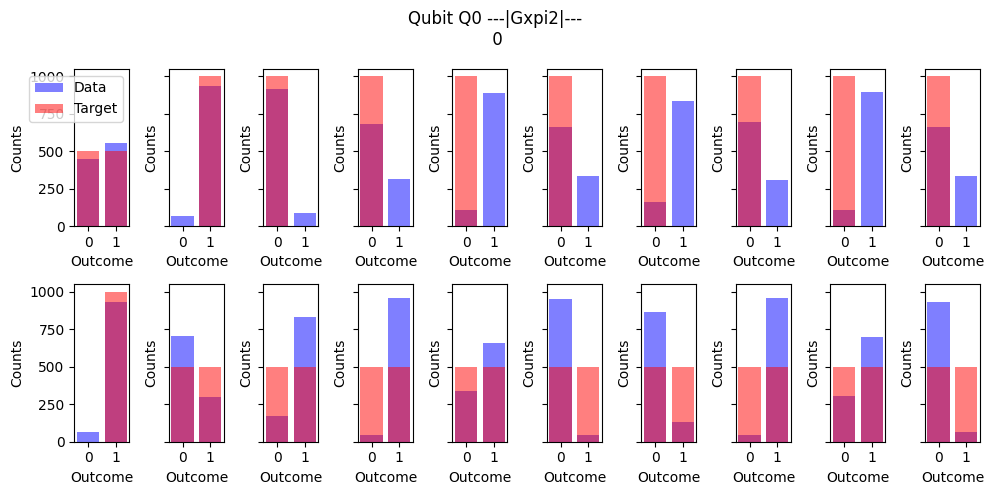

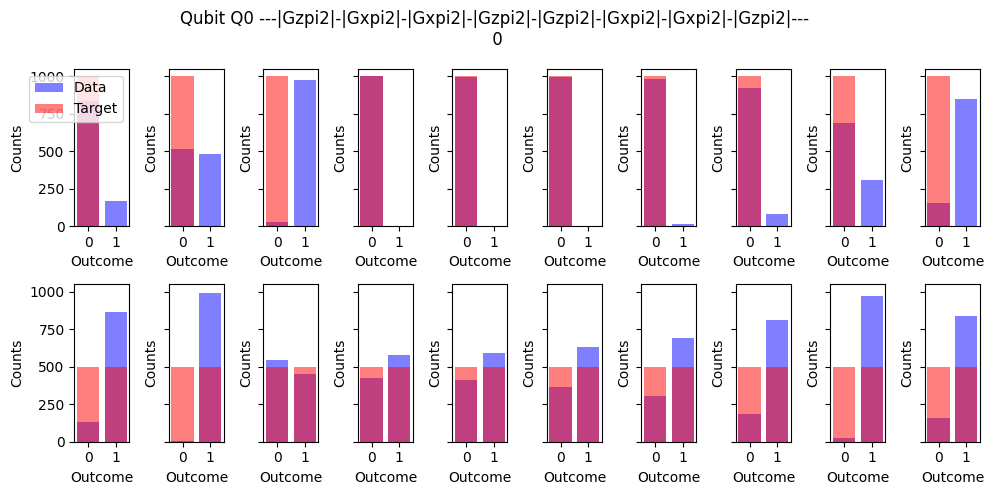

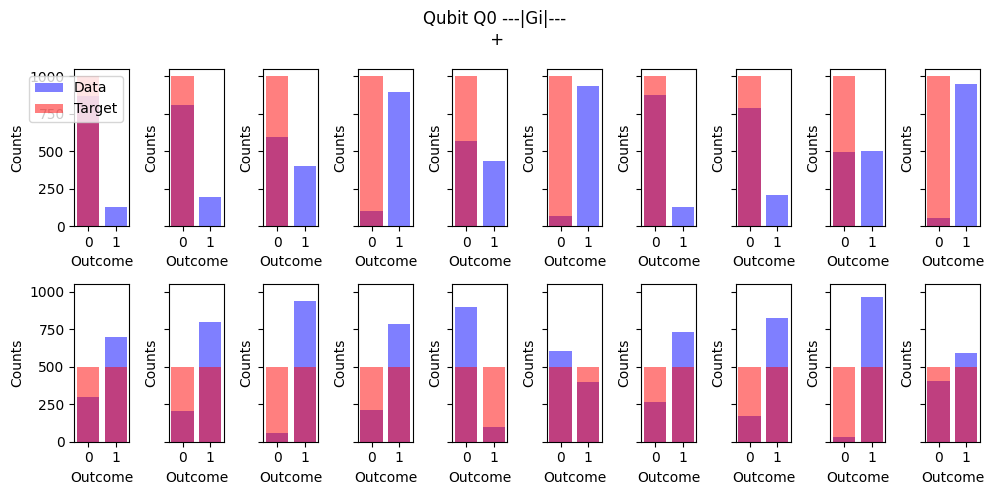

In [2156]:
analysis_xi.plot_dataset(model_1Q_target)

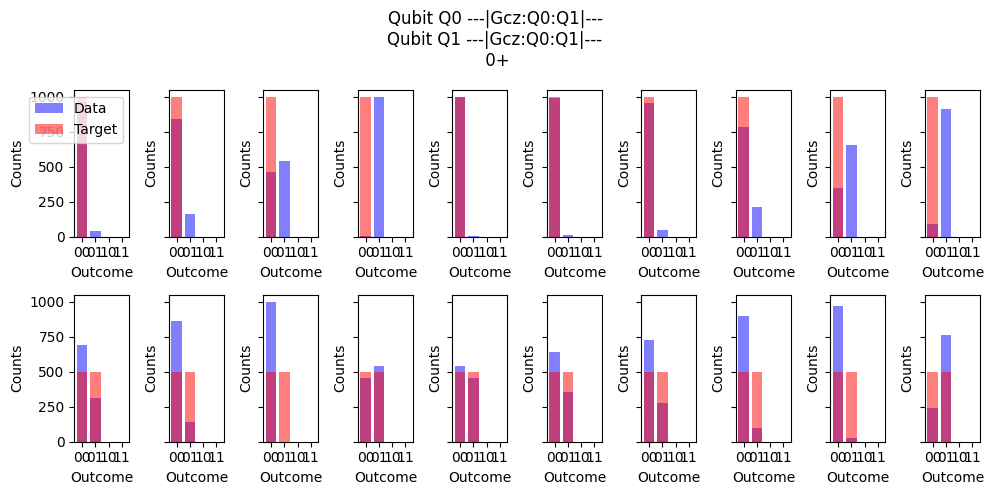

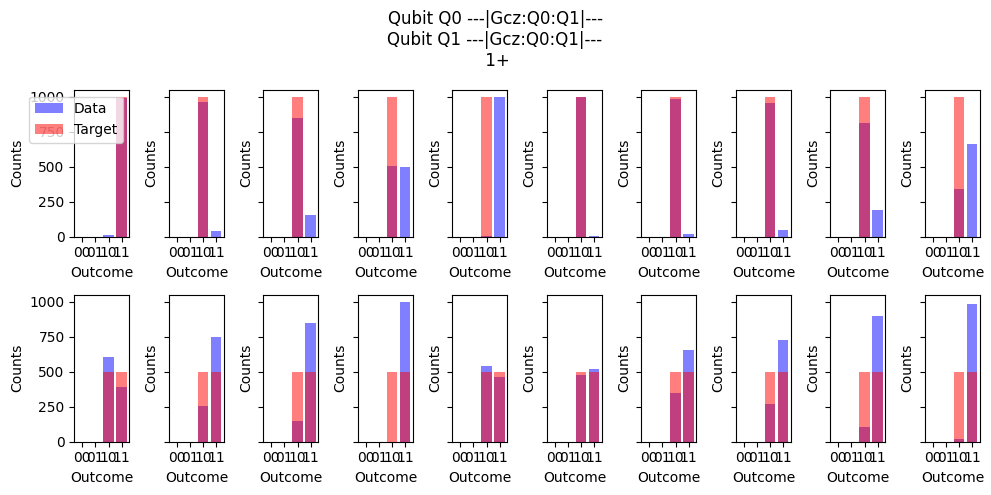

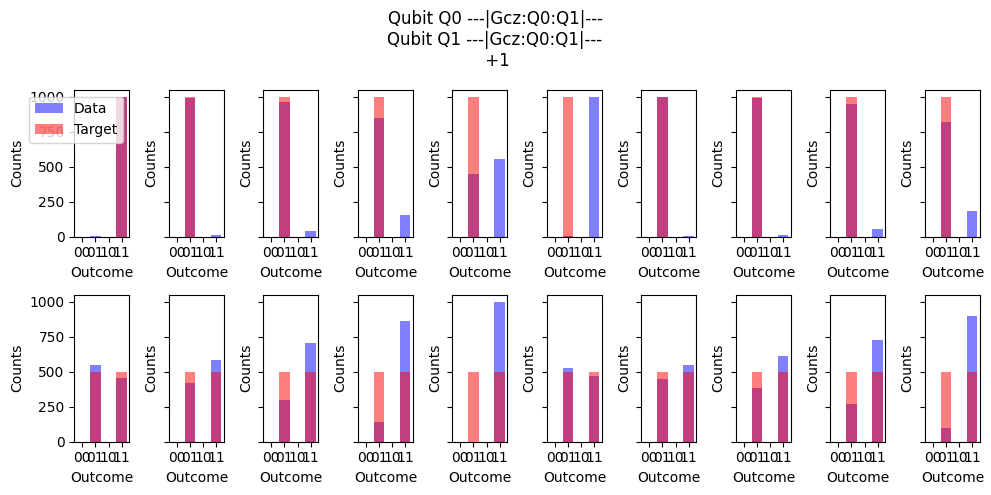

In [2157]:
analysis_cz.plot_dataset(target_model=model_2Q_target)

# Plot Signals

In [2158]:
analysis_xi.plot_all_signals()

AttributeError: 'Analysis_XI' object has no attribute 'signals'